In [1]:
#Keras Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [16]:
df.isnull().sum() #counting missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


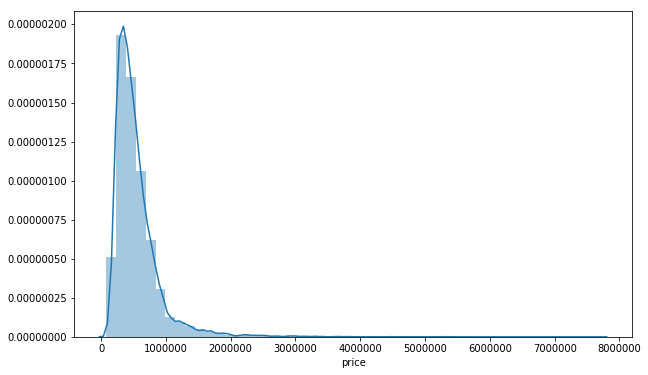

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

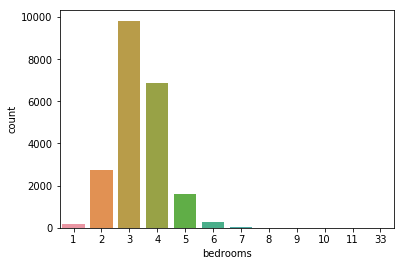

In [15]:
sns.countplot(df['bedrooms'])

In [20]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

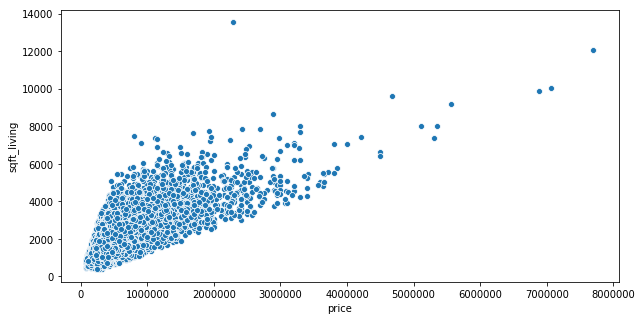

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

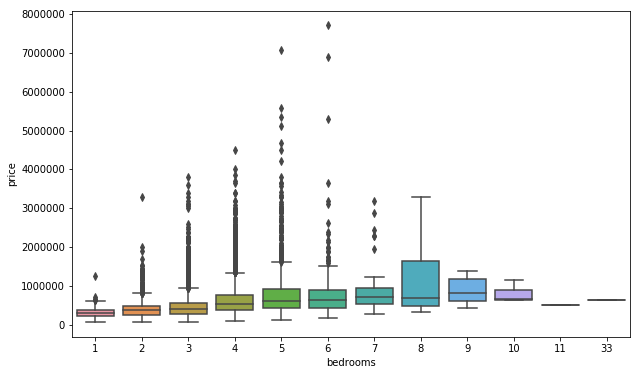

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

In [26]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

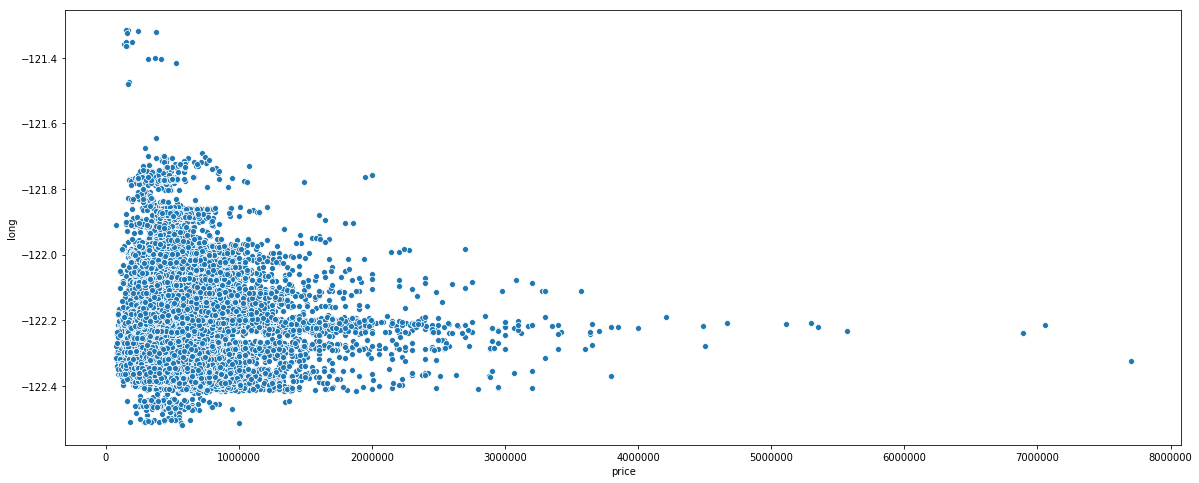

In [27]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='price',y='long',data=df)

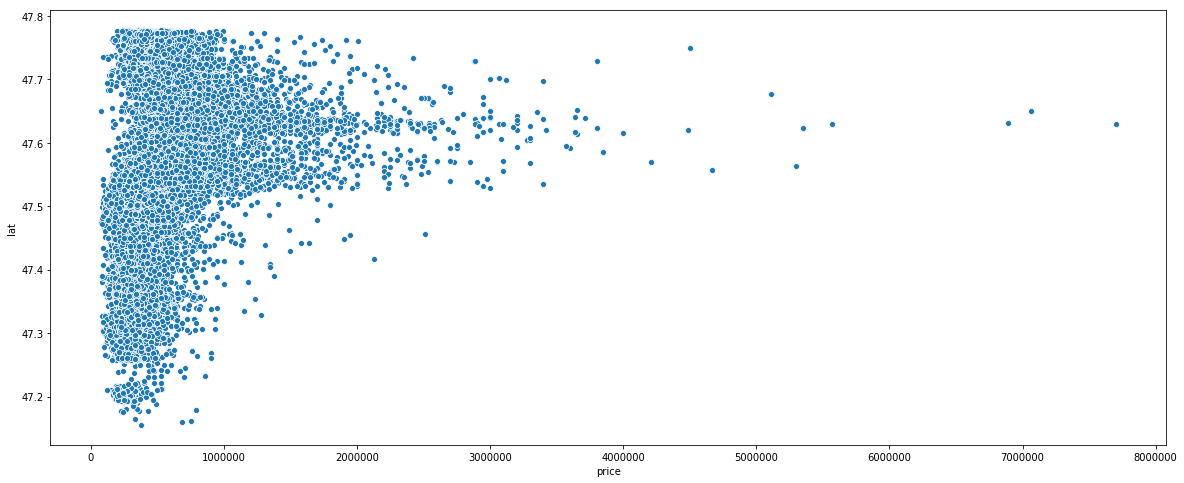

In [28]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='price',y='lat',data=df)

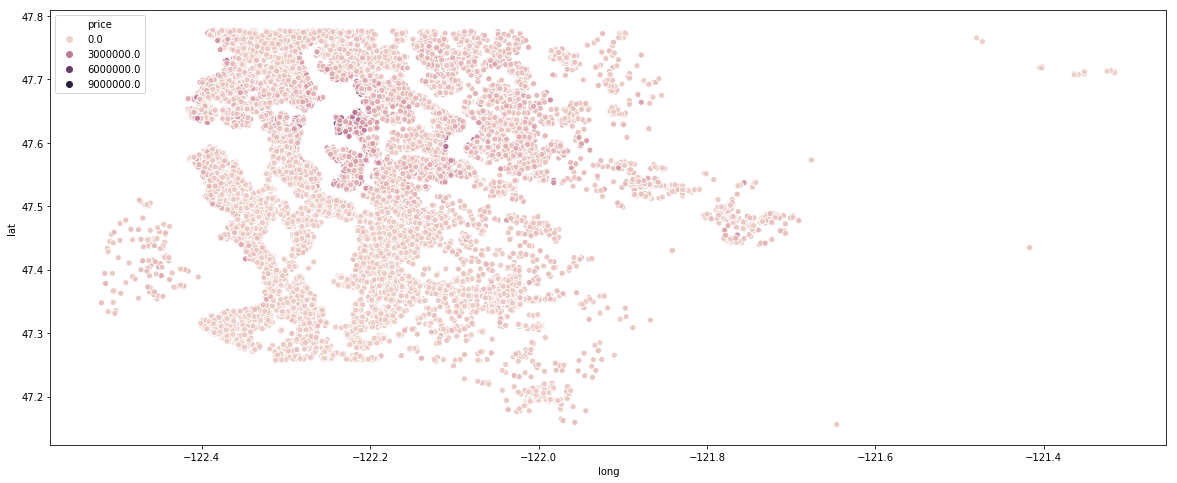

In [31]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [32]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [33]:
non_top = df.sort_values('price',ascending=False).iloc[216:]

In [34]:
non_top.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


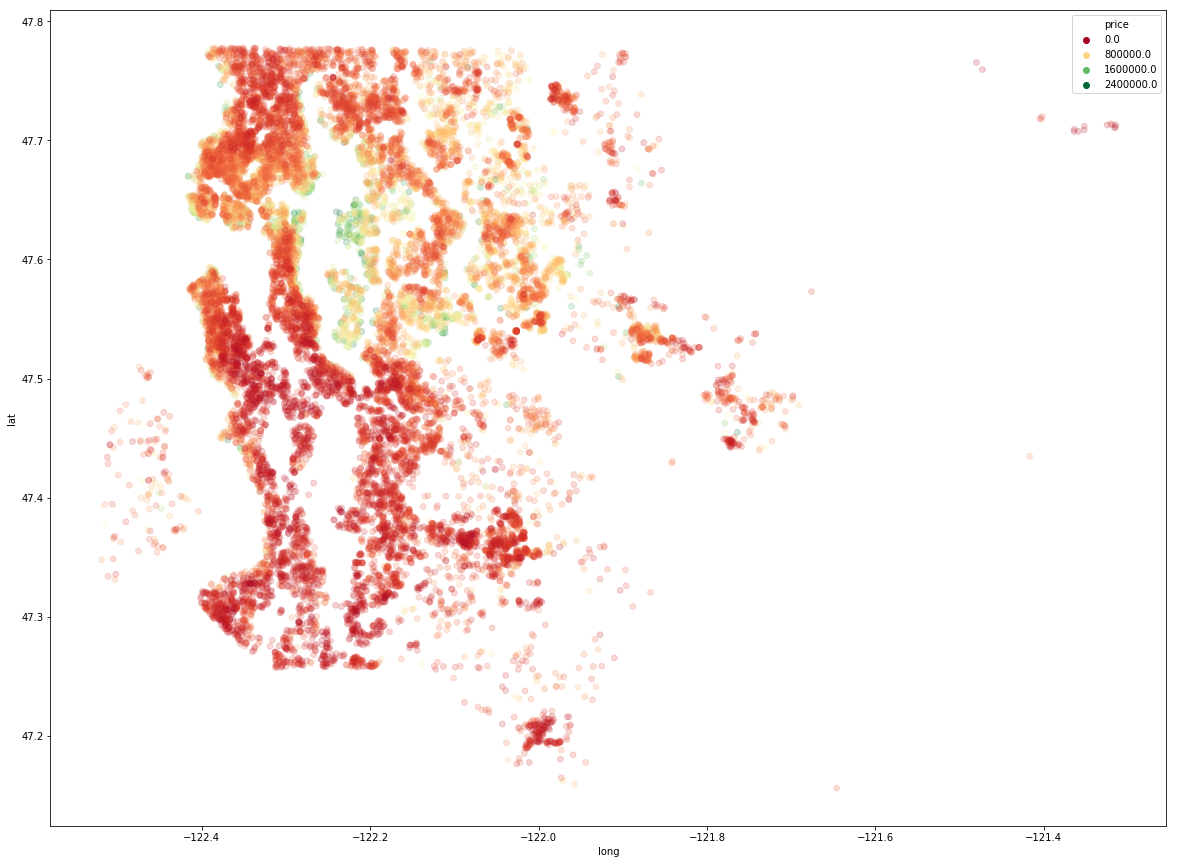

In [39]:
plt.figure(figsize=(20,15))
sns.scatterplot(alpha = 0.2,x='long',y='lat',data=non_top,edgecolor = None,hue='price',palette = 'RdYlGn')

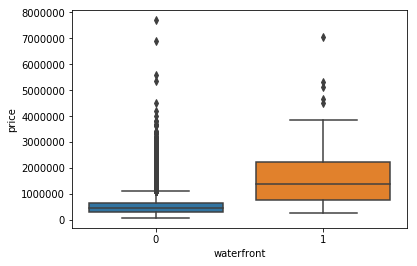

In [40]:
sns.boxplot(x='waterfront',y='price',data=df)

In [41]:
#Feature engineering process

In [42]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:
df = df.drop('id',axis=1)

In [45]:
df['date'] = pd.to_datetime(df['date'])

In [47]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
5       2014-05-12
6       2014-06-27
7       2015-01-15
8       2015-04-15
9       2015-03-12
10      2015-04-03
11      2014-05-27
12      2014-05-28
13      2014-10-07
14      2015-03-12
15      2015-01-24
16      2014-07-31
17      2014-05-29
18      2014-12-05
19      2015-04-24
20      2014-05-14
21      2014-08-26
22      2014-07-03
23      2014-05-16
24      2014-11-20
25      2014-11-03
26      2014-06-26
27      2014-12-01
28      2014-06-24
29      2015-03-02
           ...    
21567   2014-06-10
21568   2014-12-02
21569   2014-08-28
21570   2014-10-15
21571   2015-03-05
21572   2014-11-13
21573   2014-09-10
21574   2014-05-14
21575   2014-10-02
21576   2015-04-16
21577   2015-03-17
21578   2014-10-17
21579   2014-10-31
21580   2014-08-13
21581   2015-04-21
21582   2014-10-13
21583   2014-09-15
21584   2014-10-15
21585   2015-04-07
21586   2014-06-26
21587   2014-08-25
21588   2015

In [48]:
df['year'] = df['date'].apply(lambda date:date.year)

In [50]:
df['month'] = df['date'].apply(lambda date:date.month)

In [51]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


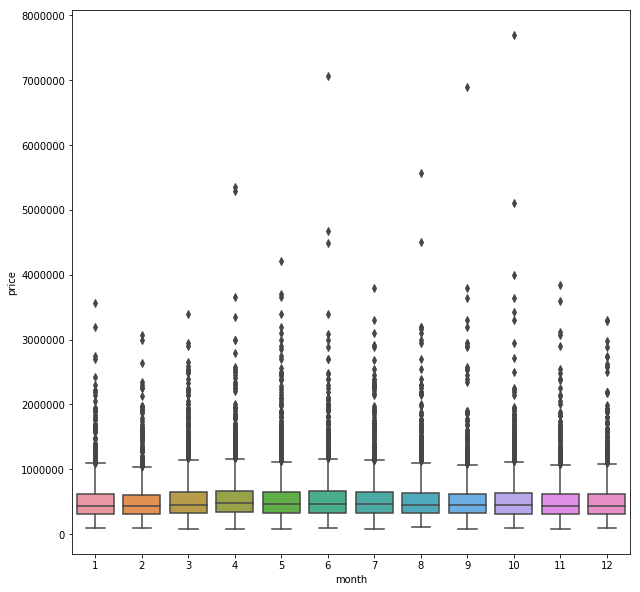

In [53]:
plt.figure(figsize=(10,10))
sns.boxplot(x='month',y='price',data=df)

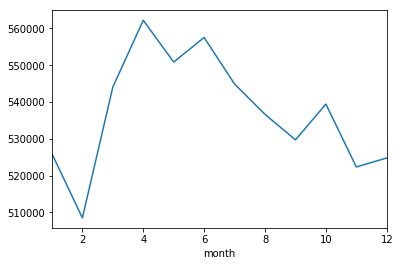

In [55]:
df.groupby('month').mean()['price'].plot()

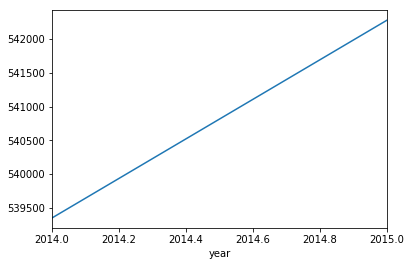

In [56]:
df.groupby('year').mean()['price'].plot()

In [57]:
df = df.drop('date',axis=1)

In [58]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [60]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [61]:
df = df.drop('zipcode',axis=1)

In [62]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [63]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [65]:
X = df.drop('price',axis=1).values
y= df['price'].values

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
X_train = scaler.fit_transform(X_train)

In [73]:
X_test = scaler.transform(X_test)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [77]:
model = Sequential()

model.add(Dense (19,activation = 'relu'))
model.add(Dense (19,activation = 'relu'))
model.add(Dense (19,activation = 'relu'))
model.add(Dense (19,activation = 'relu'))

model.add(Dense (1))
model.compile(optimizer='adam', loss='mse')

In [78]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
         batch_size = 128,epochs=400)

#validation data shows the error

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 92us/sample - loss: 430241273240.5297 - val_loss: 418919505373.8666
Epoch 2/400
15117/15117 [==============================] - 0s 27us/sample - loss: 428917626202.7524 - val_loss: 413967284451.5555
Epoch 3/400
15117/15117 [==============================] - 0s 32us/sample - loss: 406785741647.2708 - val_loss: 361289067825.9358
Epoch 4/400
15117/15117 [==============================] - 0s 29us/sample - loss: 296319828912.5430 - val_loss: 195127165008.9086
Epoch 5/400
15117/15117 [==============================] - 0s 29us/sample - loss: 136970129475.4673 - val_loss: 97707405625.5210
Epoch 6/400
15117/15117 [==============================] - 1s 34us/sample - loss: 98719457315.3594 - val_loss: 94114127255.0716
Epoch 7/400
15117/15117 [==============================] - 0s 32us/sample - loss: 96345884232.3784 - val_loss: 92408106522.5481
Epoch 8/400
15117/15117 [=====================

Epoch 64/400
15117/15117 [==============================] - 1s 35us/sample - loss: 36858238077.9255 - val_loss: 35590967842.1333
Epoch 65/400
15117/15117 [==============================] - 0s 31us/sample - loss: 36692839335.0596 - val_loss: 35569250051.1605
Epoch 66/400
15117/15117 [==============================] - 1s 33us/sample - loss: 36566281338.1322 - val_loss: 35391019635.0420
Epoch 67/400
15117/15117 [==============================] - 0s 30us/sample - loss: 36476725981.6059 - val_loss: 35186448292.9778
Epoch 68/400
15117/15117 [==============================] - 0s 32us/sample - loss: 36326840524.1633 - val_loss: 35093976192.9482
Epoch 69/400
15117/15117 [==============================] - 1s 34us/sample - loss: 36128791977.5998 - val_loss: 34969532158.1037
Epoch 70/400
15117/15117 [==============================] - 1s 34us/sample - loss: 36066984963.7933 - val_loss: 34803009035.3778
Epoch 71/400
15117/15117 [==============================] - 0s 32us/sample - loss: 35857718320.29

15117/15117 [==============================] - 0s 24us/sample - loss: 32663165559.2533 - val_loss: 31227947933.3926
Epoch 128/400
15117/15117 [==============================] - 1s 36us/sample - loss: 32678774148.7501 - val_loss: 31233485421.9852
Epoch 129/400
15117/15117 [==============================] - 1s 35us/sample - loss: 32613837446.3589 - val_loss: 31168565174.6765
Epoch 130/400
15117/15117 [==============================] - 0s 28us/sample - loss: 32591710962.3338 - val_loss: 31180181337.1259
Epoch 131/400
15117/15117 [==============================] - 0s 29us/sample - loss: 32558572123.4806 - val_loss: 31063096160.7111
Epoch 132/400
15117/15117 [==============================] - 0s 30us/sample - loss: 32513733622.3473 - val_loss: 31052506074.0741
Epoch 133/400
15117/15117 [==============================] - 0s 26us/sample - loss: 32512042020.1723 - val_loss: 30990530423.4667
Epoch 134/400
15117/15117 [==============================] - 0s 29us/sample - loss: 32458413561.6665 - v

Epoch 190/400
15117/15117 [==============================] - 0s 28us/sample - loss: 31392997801.1256 - val_loss: 29612767773.0765
Epoch 191/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31345648559.5946 - val_loss: 29596487143.9802
Epoch 192/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31305718280.5012 - val_loss: 29527375902.3407
Epoch 193/400
15117/15117 [==============================] - 0s 30us/sample - loss: 31330936233.4982 - val_loss: 29551961631.6049
Epoch 194/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31262815032.2397 - val_loss: 29578367572.7012
Epoch 195/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31270998095.3893 - val_loss: 29533843157.6494
Epoch 196/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31327415376.8118 - val_loss: 29612637358.4593
Epoch 197/400
15117/15117 [==============================] - 0s 29us/sample - loss: 312957

Epoch 253/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30543199362.2608 - val_loss: 28588097677.5901
Epoch 254/400
15117/15117 [==============================] - 0s 26us/sample - loss: 30604917441.4267 - val_loss: 28639816888.5728
Epoch 255/400
15117/15117 [==============================] - 0s 26us/sample - loss: 30598053427.2440 - val_loss: 28488039962.5481
Epoch 256/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30582462165.0031 - val_loss: 28501169559.0716
Epoch 257/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30571004916.9587 - val_loss: 28444021676.5630
Epoch 258/400
15117/15117 [==============================] - 0s 26us/sample - loss: 30523774207.7121 - val_loss: 28464781701.3728
Epoch 259/400
15117/15117 [==============================] - 0s 27us/sample - loss: 30502771079.6629 - val_loss: 28440096869.1358
Epoch 260/400
15117/15117 [==============================] - 0s 26us/sample - loss: 305013

15117/15117 [==============================] - 0s 31us/sample - loss: 30001625351.5020 - val_loss: 27824414285.1161
Epoch 317/400
15117/15117 [==============================] - 0s 31us/sample - loss: 29988410052.2717 - val_loss: 27809195399.9012
Epoch 318/400
15117/15117 [==============================] - 0s 31us/sample - loss: 29996079178.5799 - val_loss: 27781233095.1111
Epoch 319/400
15117/15117 [==============================] - 0s 31us/sample - loss: 29963908177.7601 - val_loss: 27788205316.4247
Epoch 320/400
15117/15117 [==============================] - 0s 31us/sample - loss: 29961423064.2207 - val_loss: 27752411752.9284
Epoch 321/400
15117/15117 [==============================] - 1s 34us/sample - loss: 29934187392.5842 - val_loss: 27740488853.1753
Epoch 322/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29919229262.2885 - val_loss: 27752676126.9728
Epoch 323/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29933369763.8420 - v

15117/15117 [==============================] - 0s 26us/sample - loss: 29433022598.0880 - val_loss: 27097615974.4000
Epoch 380/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29394364776.5033 - val_loss: 27101142524.2074
Epoch 381/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29431705027.4758 - val_loss: 27075271267.8716
Epoch 382/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29375557713.5569 - val_loss: 27039597757.6296
Epoch 383/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29330544072.8271 - val_loss: 27031598694.4000
Epoch 384/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29371853387.0202 - val_loss: 27031756040.2173
Epoch 385/400
15117/15117 [==============================] - 0s 26us/sample - loss: 29297183055.0337 - val_loss: 27019749558.0444
Epoch 386/400
15117/15117 [==============================] - 0s 29us/sample - loss: 29325133750.6394 - v

In [81]:
losses = pd.DataFrame(model.history.history)

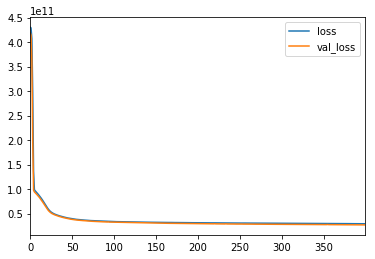

In [82]:
losses.plot()

In [83]:
 from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [84]:
predict = model.predict(X_test)

In [89]:
np.sqrt(mean_squared_error(y_test,predict))

163766.30681696004

In [91]:
mean_absolute_error(y_test,predict)

101543.83637032214

In [92]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [94]:
explained_variance_score(y_test,predict)

0.7978039190300226

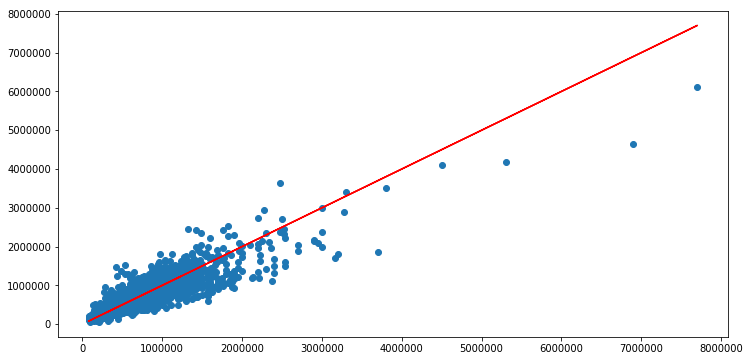

In [97]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predict)
plt.plot(y_test,y_test,'r')

In [101]:
single_house = df.drop('price',axis=1).iloc[0]

In [104]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [106]:
model.predict(single_house)

array([[288529.5]], dtype=float32)

In [107]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
